In [1]:
import pandas as pd

In [15]:
ds = pd.read_csv(r'C:\Users\hario\OneDrive\Desktop\weather_forecast.csv')

In [16]:
ds

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [20]:
## remove the column temperature beacause there is no much use of this
ds = ds.drop(columns=['Temperature'])

In [21]:
ds

,Outlook,Humidity,Windy,Play
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Weak,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Strong,Yes
7,Sunny,High,Weak,No
8,Sunny,Normal,Weak,Yes
9,Rain,Normal,Weak,Yes


In [23]:
## use the lebel encoder
from sklearn.preprocessing import LabelEncoder

In [24]:
Outlook	= LabelEncoder()
Humidity = LabelEncoder()
Windy = LabelEncoder()	
Play = LabelEncoder()

In [31]:
ds['Outlook'] = Outlook.fit_transform(ds['Outlook'])
ds['Humidity'] = Humidity.fit_transform(ds['Humidity'])
ds['Windy'] =Windy.fit_transform(ds['Windy'])
ds['Play'] = Play.fit_transform(ds['Play'])

In [29]:
ds

,Outlook,Humidity,Windy,Play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,0,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


In [32]:
feat_cols = ['Outlook',	'Humidity',	'Windy']
x = ds[feat_cols]
y = ds.Play

In [33]:
x

,Outlook,Humidity,Windy
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,0
7,2,0,1
8,2,1,1
9,1,1,1


In [34]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [39]:
x_train

,Outlook,Humidity,Windy
8,2,1,1
2,0,0,1
5,1,1,0
0,2,0,1
4,1,1,1
3,1,0,1
11,0,0,0
9,1,1,1
10,2,1,0
1,2,0,0


In [40]:
len(x_train)

11

In [41]:
len(x_test)

3

In [42]:
x_test

,Outlook,Humidity,Windy
13,1,0,0
12,0,1,1
7,2,0,1


In [43]:
y_train

8     1
2     1
5     0
0     0
4     1
3     1
11    1
9     1
10    1
1     0
6     1
Name: Play, dtype: int64

In [44]:
y_test

13    0
12    1
7     0
Name: Play, dtype: int64

In [46]:
len(y_train)

3

In [47]:
len(y_test)

3

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
classifier = DecisionTreeClassifier(criterion = 'gini')

In [51]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
classifier.predict(x_test)             #no = 0, yes = 1      outlool[sunny=2, overcast=0, rainy=1] Humidity[high=0, normal=1] Windy[weak=1, stron=0]

array([0, 1, 0], dtype=int64)

In [53]:
x_test

,Outlook,Humidity,Windy
13,1,0,0
12,0,1,1
7,2,0,1


In [54]:
classifier.score(x_test,y_test)

1.0

In [55]:
from sklearn import tree

[Text(0.5555555555555556, 0.875, 'x[0] <= 1.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2222222222222222, 0.375, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.625, 'x[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

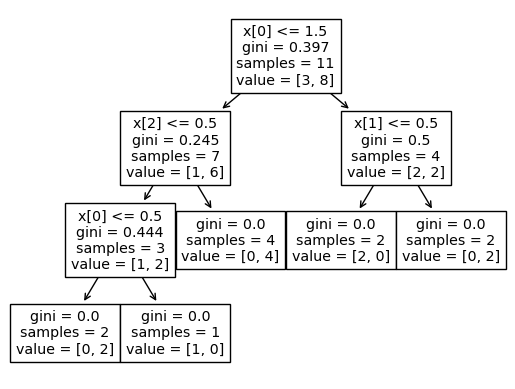

In [57]:
tree.plot_tree(classifier)

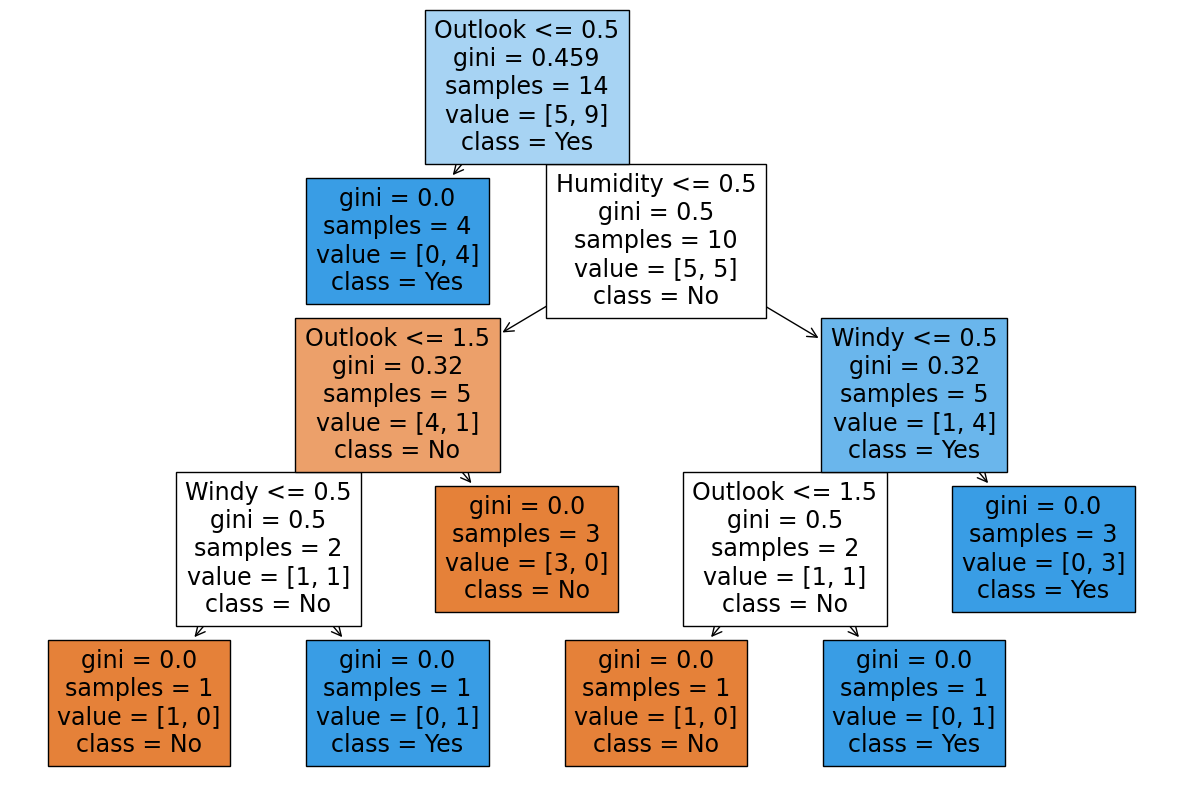

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Creating DataFrame from your data
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encoding categorical variables to numerical labels
le = LabelEncoder()
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Humidity'] = le.fit_transform(df['Humidity'])
df['Windy'] = le.fit_transform(df['Windy'])
df['Play'] = le.fit_transform(df['Play'])

# Separating features (X) and target variable (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Initialize and fit Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualizing the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=['No', 'Yes'])
plt.show()
